d:\anaconda3\envs\scanpy\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


0
第0个epoch使用的学习率：0.000000
1
第1个epoch使用的学习率：0.000010
2
第2个epoch使用的学习率：0.000020
3
第3个epoch使用的学习率：0.000030
4
第4个epoch使用的学习率：0.000040
5
第5个epoch使用的学习率：0.000050
6
第6个epoch使用的学习率：0.000060
7
第7个epoch使用的学习率：0.000070
8
第8个epoch使用的学习率：0.000080
9
第9个epoch使用的学习率：0.000090
10
第10个epoch使用的学习率：0.000100
11
第11个epoch使用的学习率：0.000110
12
第12个epoch使用的学习率：0.000120
13
第13个epoch使用的学习率：0.000130
14
第14个epoch使用的学习率：0.000140
15
第15个epoch使用的学习率：0.000150
16
第16个epoch使用的学习率：0.000160
17
第17个epoch使用的学习率：0.000170
18
第18个epoch使用的学习率：0.000180
19
第19个epoch使用的学习率：0.000190
20
第20个epoch使用的学习率：0.000200
21
第21个epoch使用的学习率：0.000210
22
第22个epoch使用的学习率：0.000220
23
第23个epoch使用的学习率：0.000230
24
第24个epoch使用的学习率：0.000240
25
第25个epoch使用的学习率：0.000250
26
第26个epoch使用的学习率：0.000260
27
第27个epoch使用的学习率：0.000270
28
第28个epoch使用的学习率：0.000280
29
第29个epoch使用的学习率：0.000290
30
第30个epoch使用的学习率：0.000300
31
第31个epoch使用的学习率：0.000310
32
第32个epoch使用的学习率：0.000320
33
第33个epoch使用的学习率：0.000330
34
第34个epoch使用的学习率：0.000340
35
第35个epoch使用的学习率：0.000350
36
第36个epoch

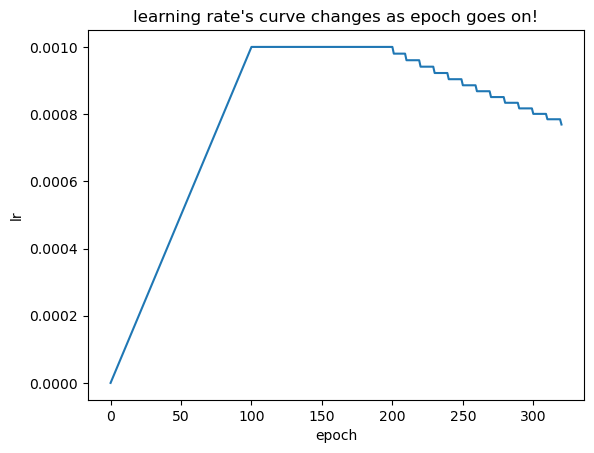

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from exfold.utils.lr_schedulers import (
    # CosineAnnealingWarmupRestarts, 
    # CosineAnnealingWarmupRestarts2,
    AlphaFoldLRScheduler,
)
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3)

    def forward(self, x):
        pass

net = model()
base_lr = 0
optimizer = torch.optim.SGD(net.parameters(), lr=base_lr, momentum=0.9, weight_decay=1e-5) # lr is min lr

# scheduler = CosineAnnealingWarmupRestarts(
#     optimizer=optimizer,
#     first_cycle_steps=50,
#     cycle_mult=1.2,
#     max_lr=1e-3,
#     min_lr=base_lr,
#     warmup_steps=10,
#     gamma=1.0,
#     last_epoch=-1
# )
scheduler = AlphaFoldLRScheduler(
    optimizer=optimizer,
    last_epoch=-1,
    base_lr=base_lr,
    max_lr=1e-3,
    warmup_steps=100,
    start_decay_after_n_steps=200,
    decay_every_n_steps=10,
    decay_factor=0.98
)
a = -1
lr_list = [] # 把使用过的lr都保存下来，之后画出它的变化
min_epoch = 0
max_epoch = 321
for epoch in range(min_epoch, max_epoch):
    # train
    optimizer.zero_grad()
    optimizer.step()
    print(scheduler.last_epoch)
    print("第%d个epoch使用的学习率：%f" % (epoch, optimizer.param_groups[0]['lr']))
    lr_list.append(optimizer.param_groups[0]['lr'])
    scheduler.step()
    a+=1
opt_sd = optimizer.state_dict()
sc_sd = scheduler.state_dict()

# 画出lr的变化
plt.plot(list(range(min_epoch, max_epoch)), lr_list)
plt.xlabel("epoch")
plt.ylabel("lr")
plt.title("learning rate's curve changes as epoch goes on!")
plt.show()

In [2]:
optimizer2 = torch.optim.SGD(net.parameters(), lr=base_lr, momentum=0.9, weight_decay=1e-5)
optimizer2.load_state_dict(opt_sd)
scheduler2 = AlphaFoldLRScheduler(
    optimizer=optimizer2,
    last_epoch=sc_sd["last_epoch"] - 1,
    base_lr=base_lr,
    max_lr=1e-3,
    warmup_steps=100,
    start_decay_after_n_steps=200,
    decay_every_n_steps=10,
    decay_factor=0.98
)
print(scheduler2.last_epoch)
scheduler2.load_state_dict(sc_sd)
print(scheduler2.last_epoch)

321
321


321
第321个epoch的学习率：0.000769
322
第322个epoch的学习率：0.000769
323
第323个epoch的学习率：0.000769
324
第324个epoch的学习率：0.000769
325
第325个epoch的学习率：0.000769
326
第326个epoch的学习率：0.000769
327
第327个epoch的学习率：0.000769
328
第328个epoch的学习率：0.000769
329
第329个epoch的学习率：0.000769
330
第330个epoch的学习率：0.000754
331
第331个epoch的学习率：0.000754
332
第332个epoch的学习率：0.000754
333
第333个epoch的学习率：0.000754
334
第334个epoch的学习率：0.000754
335
第335个epoch的学习率：0.000754
336
第336个epoch的学习率：0.000754
337
第337个epoch的学习率：0.000754
338
第338个epoch的学习率：0.000754
339
第339个epoch的学习率：0.000754
340
第340个epoch的学习率：0.000739
341
第341个epoch的学习率：0.000739
342
第342个epoch的学习率：0.000739
343
第343个epoch的学习率：0.000739
344
第344个epoch的学习率：0.000739
345
第345个epoch的学习率：0.000739
346
第346个epoch的学习率：0.000739
347
第347个epoch的学习率：0.000739
348
第348个epoch的学习率：0.000739
349
第349个epoch的学习率：0.000739
350
第350个epoch的学习率：0.000724
351
第351个epoch的学习率：0.000724
352
第352个epoch的学习率：0.000724
353
第353个epoch的学习率：0.000724
354
第354个epoch的学习率：0.000724
355
第355个epoch的学习率：0.000724
356
第356个epoch的学习率：0

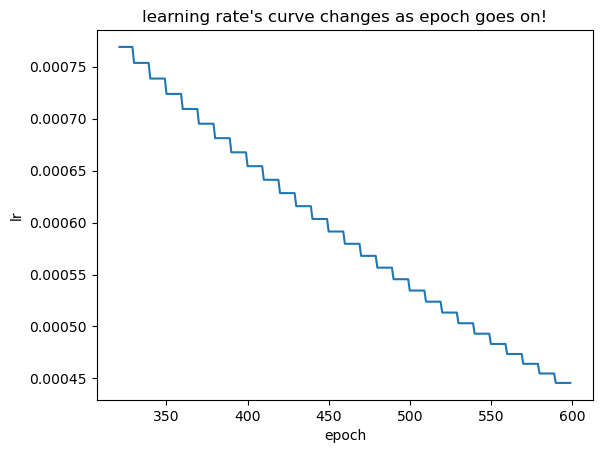

In [3]:
lr_list = [] # 把使用过的lr都保存下来，之后画出它的变化
min_epoch = max_epoch
max_epoch = 600
for epoch in range(min_epoch, max_epoch):
    # train
    optimizer2.zero_grad()
    optimizer2.step()
    print(scheduler2.last_epoch)
    print("第%d个epoch的学习率：%f" % (epoch, optimizer2.param_groups[0]['lr']))
    lr_list.append(optimizer2.param_groups[0]['lr'])
    scheduler2.step()

# 画出lr的变化
plt.plot(list(range(min_epoch, max_epoch)), lr_list)
plt.xlabel("epoch")
plt.ylabel("lr")
plt.title("learning rate's curve changes as epoch goes on!")
plt.show()

In [4]:
optimizer2 = torch.optim.SGD(net.parameters(), lr=base_lr, momentum=0.9, weight_decay=1e-5)
optimizer2.load_state_dict(sd1)
scheduler2 = CosineAnnealingWarmupRestarts(
    optimizer=optimizer2,
    first_cycle_steps=50,
    cycle_mult=1.2,
    max_lr=1e-3,
    min_lr=base_lr,
    warmup_steps=10,
    gamma=1.0,
    last_epoch=320
)
scheduler2.load_state_dict(sd2)

NameError: name 'sd1' is not defined

In [ ]:
lr_list = [] # 把使用过的lr都保存下来，之后画出它的变化
min_epoch = 321
max_epoch = 600
for epoch in range(min_epoch, max_epoch):
    # train
    optimizer2.zero_grad()
    optimizer2.step()
    print(scheduler2.last_epoch)
    print("第%d个epoch的学习率：%f" % (epoch, optimizer2.param_groups[0]['lr']))
    lr_list.append(optimizer2.param_groups[0]['lr'])
    scheduler2.step()

# 画出lr的变化
plt.plot(list(range(min_epoch, max_epoch)), lr_list)
plt.xlabel("epoch")
plt.ylabel("lr")
plt.title("learning rate's curve changes as epoch goes on!")
plt.show()

在betafold中，lr_scheduler恢复last_epoch: 应该是之前lr_scheduler的last_epoch - 1，或者是已经完成的epoch（从0开始），因为重新初始化时last_epoch会+1。如果实在很难确定也可以不管是否-1，因为差别很小。

In [1]:
import re

def parse_clusters(text):
    clusters = {}
    current_cluster = None

    for line in text.splitlines():
        # 检查是否是聚类名称行
        cluster_match = re.match(r"^>Cluster (\d+)", line)
        if cluster_match:
            current_cluster = f"Cluster {cluster_match.group(1)}"
            clusters[current_cluster] = []
        elif current_cluster:
            # 提取每一行中的序列名称
            sequence_match = re.search(r">(\S+)", line)
            if sequence_match:
                sequence_name = sequence_match.group(1)
                clusters[current_cluster].append(sequence_name)

    return clusters

# 示例输入
text = """>Cluster 0
0\t12nt, >2xnr_B... at +/91.67%
1\t17nt, >6dnh_D... at +/88.24%
2\t20nt, >5xow_B... at -/80.00%
3\t21nt, >4z4i_B... at -/80.95%
4\t11nt, >4z4i_C... at +/90.91%
5\t21nt, >7c7a_M... at -/80.95%
6\t11nt, >5or0_B... at -/90.91%
7\t12nt, >3gs8_B... at +/83.33%
8\t16nt, >5vjb_A... at +/81.25%
9\t12nt, >2fgp_B... at +/83.33%"""

# 解析结果
clusters = parse_clusters(text)
for cluster, sequences in clusters.items():
    print(f"{cluster}: {sequences}")


Cluster 0: ['2xnr_B...', '6dnh_D...', '5xow_B...', '4z4i_B...', '4z4i_C...', '7c7a_M...', '5or0_B...', '3gs8_B...', '5vjb_A...', '2fgp_B...']
